# **Analysis of Electric Vehicle Adoption in Washington State**
### **Team 5**
* Justin, Gitelman
* Minje (Lima), Kim
* Pei-Chun (Paige), Yang
* Raghav, Verma
* Su Min, Tan




---

# **Project objective/proposal**

This project aims to deepdive into the EV market in the state of Washington to:
* Identify adoption trends of electric vehicles (EVs) across cities in Washington, and note patterns and insights that would enable key stakeholders such as EV manufacturers and the government to understand the market dynamics of the EV market and key infrastructure requirements that encourage adoption.
* Examine the relationship between the adoption of EVs and the availability of various charging infrastructure across various cities.


---

# **Executive Summary**

We utilized Electric Vehicle Population Data and Electric Vehicle Charging Stations data as the primary datasets to construct our project. The exploratory data analysis phase began with the generation of several tables and graphs. Subsequently, we processed, imported, and merged our main data files with supplementary datasets, which included geography, population, historical sales, and traffic counts. Through this data, we gained insights on EVs and Headcount Per Charger in the Top 10 Most Populous Cities in Washington. Additionally, we applied machine learning techniques in regression analysis to predict EV sales over the next decade. This should provide the government with an understanding of potential EV growth in the future. Lastly, we outlined some challenges we faced during the project and concluded with recommendations, including the number of chargers the government should build and how to prioritize which cities should have them implemented.


---

# **Dashboard**

**Page 1:** [Link](https://public.tableau.com/app/profile/raghav.verma2542/viz/IS833ProjectDashboardPage1/Dashboard1)

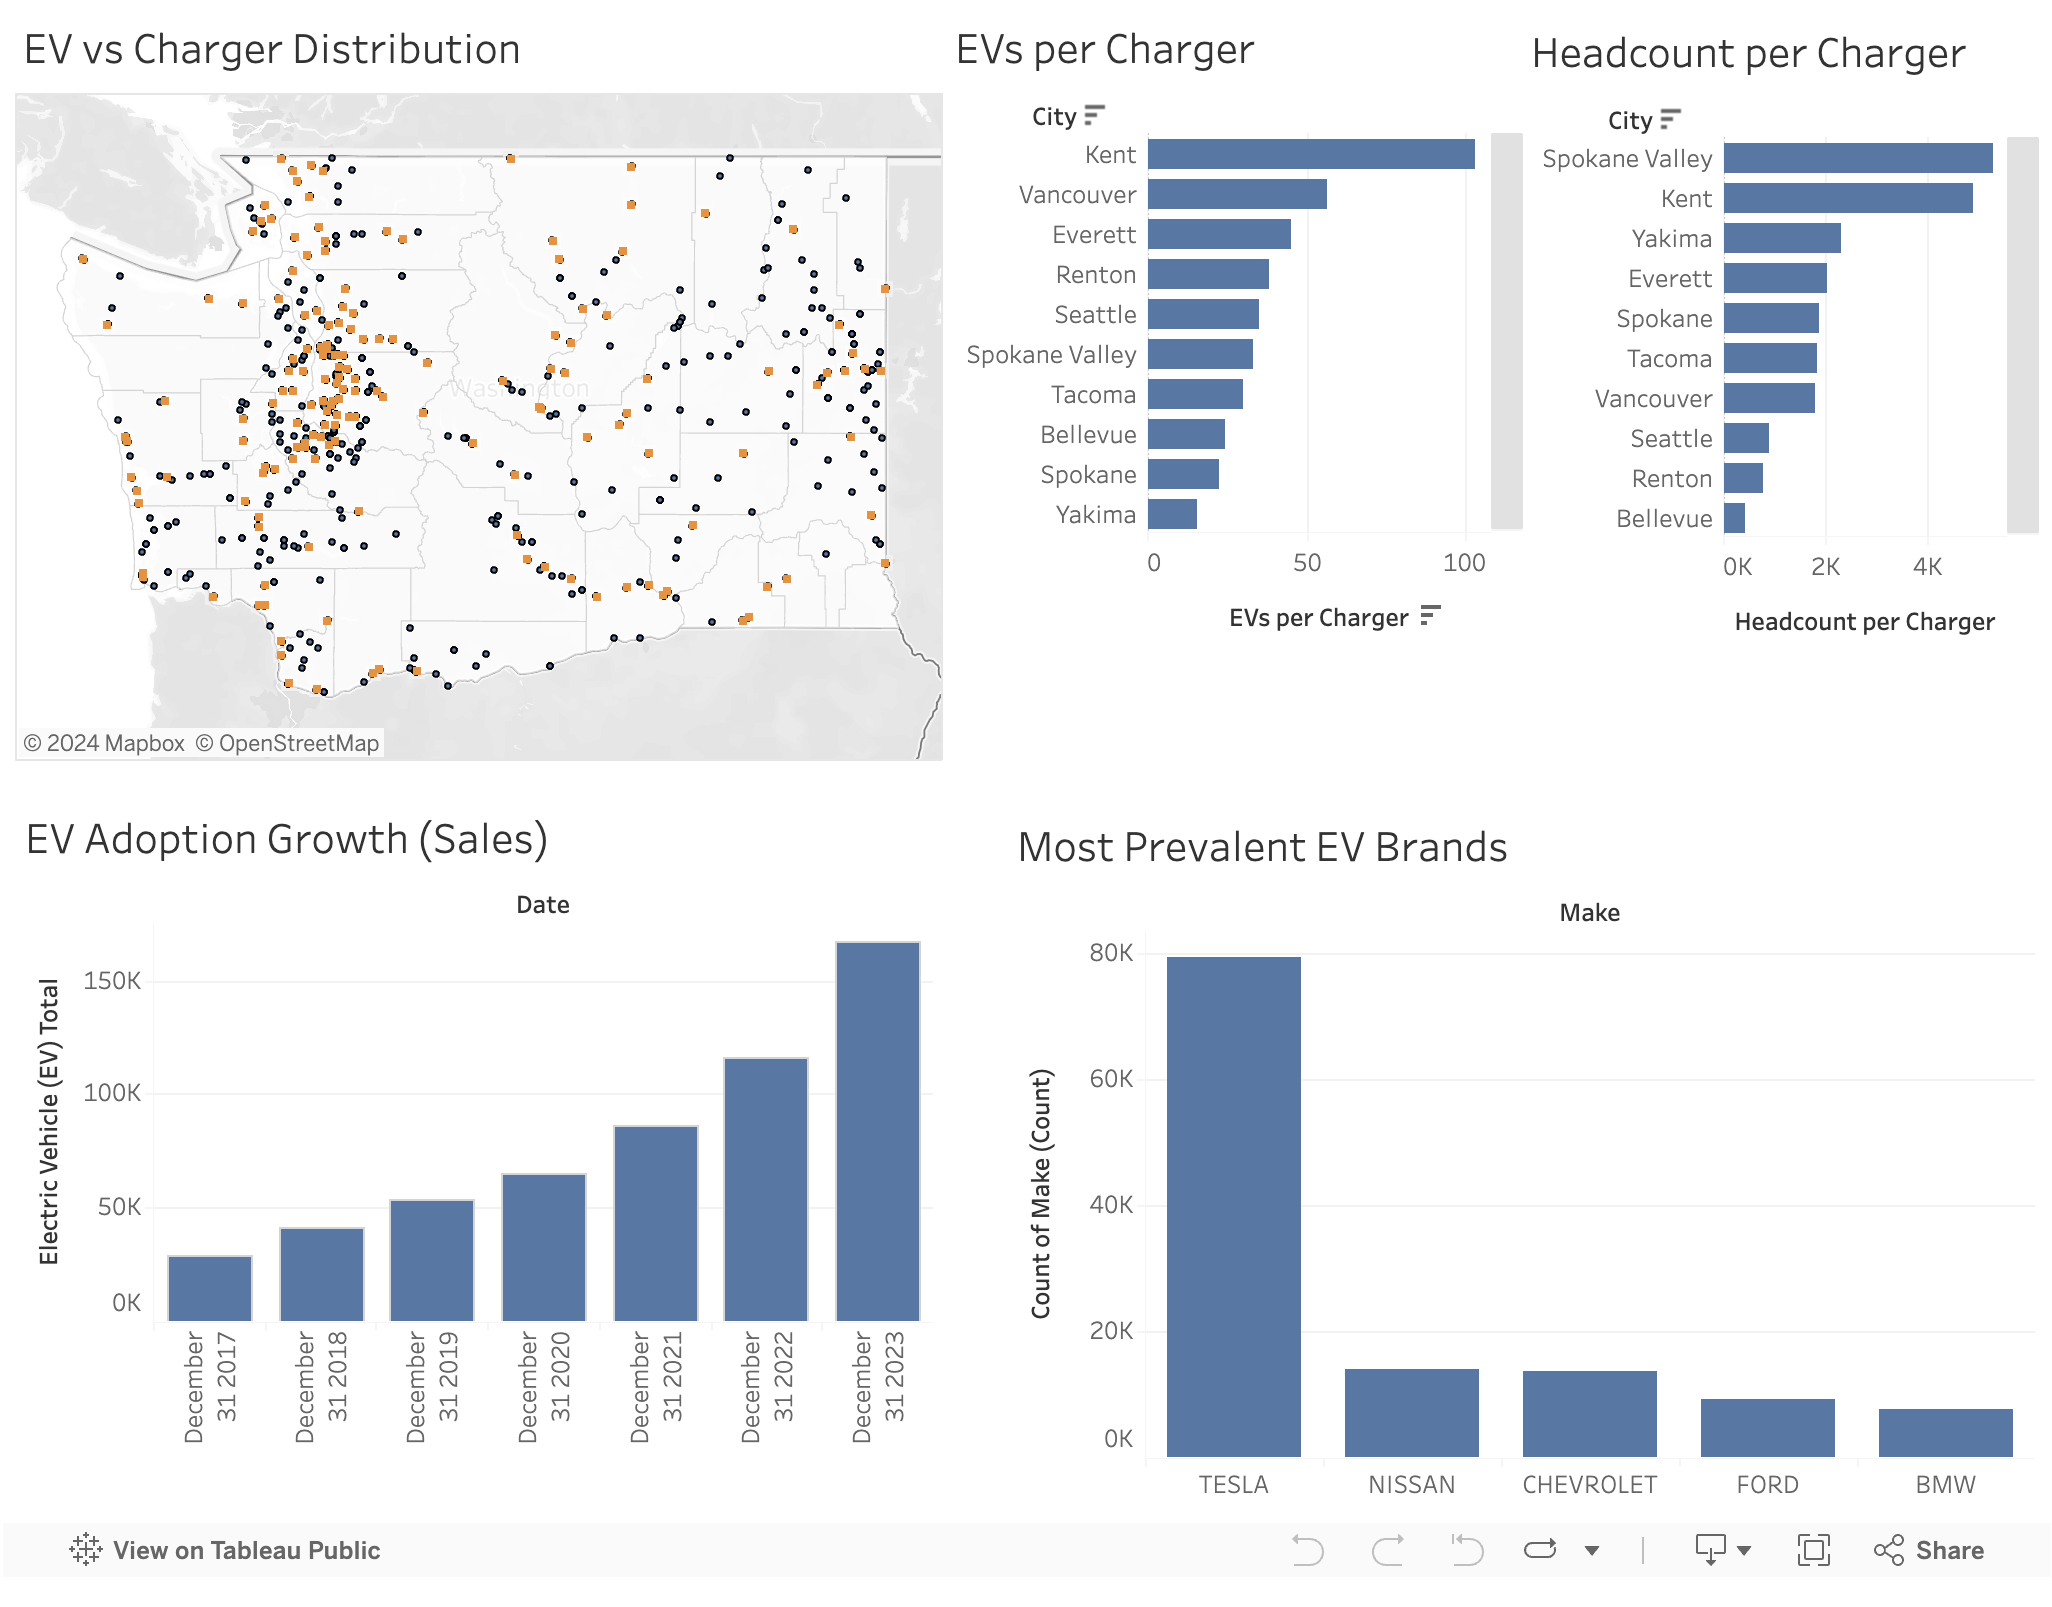

**Page 2:** [Link](https://public.tableau.com/app/profile/raghav.verma2542/viz/IS833ProjectDashboardPage2/Dashboard2)

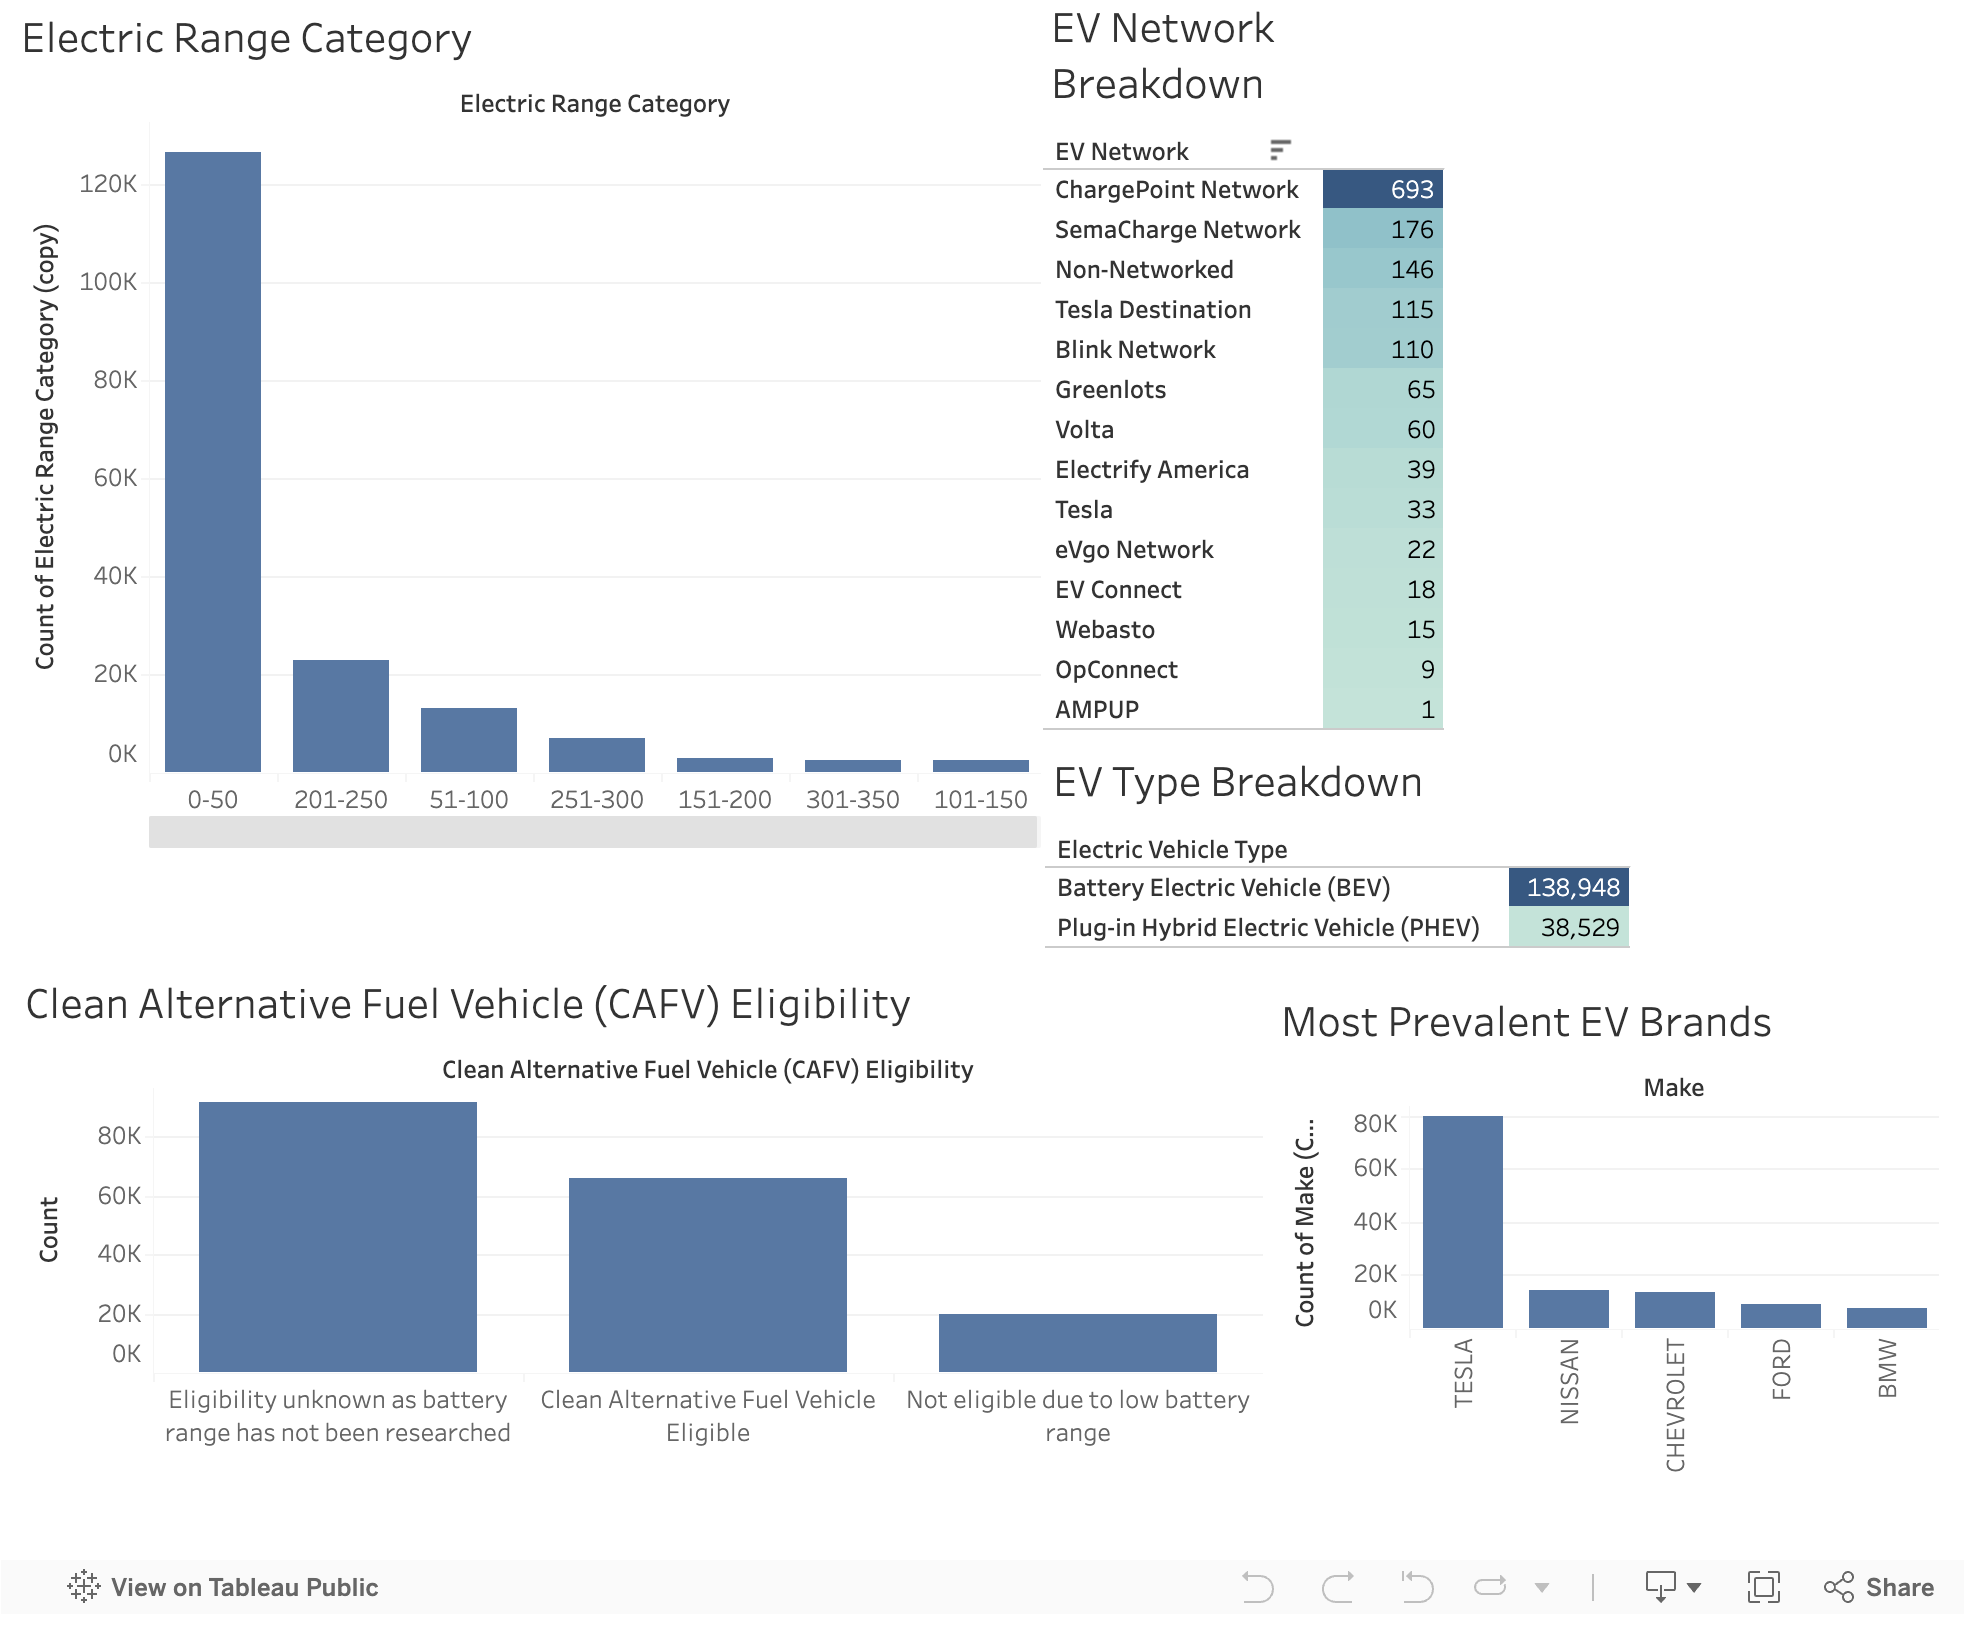


---

# **Data Sources**

Our 2 main sources of data are:
1.   Electric Vehicle Population Data: State of Washington ([Direct access link](https://catalog.data.gov/dataset/electric-vehicle-population-data))
2.   Electric Vehicle Charging Stations: The Urban Institute ([Direct access link](https://datacatalog.urban.org/node/6463/revisions/15648/view))


Additionally, to contextualise the location data of the EVs and charging stations, we have retrieved information from:
* Washington Geospatial Open Data Portal  ([Direct access link1](https://geo.wa.gov/datasets/12712f465fc44fb58328c6e0255ca27e/explore?location=47.092995%2C-120.817600%2C6.73), [Direct access link2](https://drive.google.com/drive/folders/1DSeCetnhUtDMA_NnFxaY0YVWCV9rw2hg?usp=sharing))

* Washington Cities by Population ([Direct access link](https://drive.google.com/file/d/106KXBbirN0nJOMVMjxEAjM9g5owxR6Qc/view?usp=sharing))

* Electric Vehicle History Sales in Washington ([Direct access link](https://drive.google.com/file/d/1ljL-tFDjBQDvkmykw0Is4bAy6pnXdHwB/view?usp=sharing))

* Traffic Count in Washington ([Direct access link](https://drive.google.com/file/d/1Im2PGfeDfBBHy8ePjFXAV45p0SSI7_eq/view?usp=sharing))


## **Data attributes**

**Overview of information available on Electric Vehicle Population:**
* **VIN (1-10):** Unique Vehicle Identification Number
* **County:** County of registered vehicle
* **City:** City of registered vehicle
* **State:** State of registered vehicle
* **Postal Code:** Postal Code of registered vehicle
* **Legislative District:** ID number of the legislative district
* **DOL Vehicle ID:** Unique identifier for each vehicle
* **Vehicle Location:** Latitude and Longitude of vehicle's location
* **Longitude:** Longitude of vehicle's location
* **Latitude:** Latitude of vehicle's location
* **Electric Vehicle Type:** Type of EV *(Categories: Battery Electric Vehicle(BEV) / Plug-in Hybrid Electric Vehicle(PHEV))*
* **Make:** Brand of registered vehicle
* **Model:** Model of registered vehicle
* **Model Year:** Model Year of registered vehicle
* **Clean Alternative Fuel Vehicle (CAFV) Eligibility:** Sales and use tax exemption for the sales of vehicles powered by a clean alternative fuel and certain plug-in hybrids. *(Categories: Eligibility unknown as battery range has not been researched / Clean Alternative Fuel Vehicle Eligible / Not eligible due to low battery range)*
* **Electric Range:** Distance an electric or hybrid vehicle can travel before the battery needs to be recharged.
* **Electric Utility:** Utility provider


**Overview of information available on Electric Vehicle Charging Stations:**
* **Fuel Type Code:** Type of fuel available at the fuel station *(Categories: Electric / Other)*
* **Street Address:** Street address of electric vehicle charging station
* **City:** City of electric vehicle charging station
* **State:** State of electric vehicle charging station
* **ZIP:** Zip Code of electric vehicle charging station
* **Country:** Country of electric vehicle charging station
* **Latitude:** Latitude of electric vehicle charging station
* **Longitude:** Longitude of electric vehicle charging station
* **ID:** Station ID
* **Status Code:** Status of electric vehicle charging station *(Categories: Functional / Temporarily out of service)*
* **Access Days Time:** When the electric vehicle charging station is accessible
* **Groups With Access Code:** Chargers requiring access codes *(Categories: Public / Public - Call ahead / Public - Credit card at all times / Public - Card key at all times)*
* **EV Level1 EVSE Num:** Number of EV Level 1 chargers at electric vehicle charging station
* **EV Level2 EVSE Num:** Number of EV Level 2 chargers at electric vehicle charging station
* **EV DC Fast Count:** Number of Electric Vehicle Direct Current chargers at electric vehicle charging station
* **EV Network:** Brand of charging station
* **Owner Type Code:** The type of organization that owns the fueling infrastructure. *(Categories: FG: Federal Government Owned / J: Jointly Owned / LG: Local/Municipal Government Owned / P: Privately Owned / SG: State/Provincial Government Owned / T: Utility Owned)*
* **EV Connector Types:** EV connector type available at the station *(Categories: NEMA1450 / NEMA515 / NEMA520 / J1772 / J1772COMBO / CHADEMO / TESLA)*
* **EV Pricing:** Pricing rates for charging


---

# **Introduction & motivation**

The goal of this project is to analyze the adoption trends of electric vehicles (EVs) across cities in Washington, focusing on factors such as model year, make, model, electric vehicle type, and electric range.
This project aims to identify patterns and insights that could help stakeholders understand the growth of electric vehicle usage, consumer preferences, and potential areas for infrastructure development, such as charging stations. This project is important to enable EV companies and the government to assess, plan, improvize, and adapt to changing EV trends and adoption patterns among consumers and build the optimal infrastructure network. This would hugely help reduce carbon emissions and minimize the ill-effects of climate change.





---


# **Preparing the Raw Data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data on EV Population**

In [ ]:
ev_population_filepath = '/content/drive/MyDrive/data files/Electric_Vehicle_Population_Data.csv'
ev_population_raw = pd.read_csv(ev_population_filepath)

In [ ]:
ev_population_raw.info()

ev_population_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173533 entries, 0 to 173532
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         173533 non-null  object 
 1   County                                             173528 non-null  object 
 2   City                                               173528 non-null  object 
 3   State                                              173533 non-null  object 
 4   Postal Code                                        173528 non-null  float64
 5   Model Year                                         173533 non-null  int64  
 6   Make                                               173533 non-null  object 
 7   Model                                              173533 non-null  object 
 8   Electric Vehicle Type                              173533 non-null  object

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10


## **Data on EV Charging Stations**

In [ ]:
ev_charging_stations_filepath = '/content/drive/MyDrive/data files/us_alt_fuel_stations.csv'
ev_charging_stations_raw = pd.read_csv(ev_charging_stations_filepath)

<ipython-input-53-e649fdd71261>:2: DtypeWarning: Columns (3,13,20,29,31,32,39,40,45,46,47,54,55,63) have mixed types. Specify dtype option on import or set low_memory=False.
  ev_charging_stations_raw = pd.read_csv(ev_charging_stations_filepath)


In [ ]:
ev_charging_stations_raw.info()

ev_charging_stations_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48984 entries, 0 to 48983
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    48984 non-null  object 
 1   Station Name                      48984 non-null  object 
 2   Street Address                    48984 non-null  object 
 3   Intersection Directions           1876 non-null   object 
 4   City                              48983 non-null  object 
 5   State                             48984 non-null  object 
 6   ZIP                               48984 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     48701 non-null  object 
 9   Status Code                       48984 non-null  object 
 10  Expected Date                     0 non-null      float64
 11  Groups With Access Code           48984 non-null  object 
 12  Acce

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source
0,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,California Air Resources Board,9530 Telstar Ave,NaN,El Monte,CA,91731,NaN,626-575-6800,E,...,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Scripps Green Hospital,10666 N Torrey Pines Rd,"Patient Parking Structure, level G",La Jolla,CA,92037,NaN,858-554-9100,E,...,Pay to Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,San Diego Wild Animal Park,15500 San Pasqual Valley Rd,NaN,Escondido,CA,92027,NaN,760-747-8702,E,...,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,Galpin Motors,15421 Roscoe Blvd,NaN,Sepulveda,CA,91343,NaN,800-256-6219,E,...,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove attributes with no entries

attributes_with_no_entries = ['Plus4',
'Expected Date',
'BD Blends',
'NG Fill Type Code',
'NG PSI',
'Hydrogen Status Link',
'NG Vehicle Class',
'LPG Primary',
'E85 Blender Pump',
'BD Blends (French)',
'Hydrogen Is Retail',
'CNG Dispenser Num',
'CNG On-Site Renewable Source',
'CNG Total Compression Capacity',
'CNG Storage Capacity',
'LNG On-Site Renewable Source',
'E85 Other Ethanol Blends',
'LPG Nozzle Types',
'Hydrogen Pressures',
'Hydrogen Standards',
'CNG Fill Type Code',
'CNG PSI',
'CNG Vehicle Class',
'LNG Vehicle Class']

ev_charging_stations = ev_charging_stations_raw.drop(columns=attributes_with_no_entries)
ev_charging_stations.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48984 entries, 0 to 48983
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    48984 non-null  object 
 1   Station Name                      48984 non-null  object 
 2   Street Address                    48984 non-null  object 
 3   Intersection Directions           1876 non-null   object 
 4   City                              48983 non-null  object 
 5   State                             48984 non-null  object 
 6   ZIP                               48984 non-null  object 
 7   Station Phone                     48701 non-null  object 
 8   Status Code                       48984 non-null  object 
 9   Groups With Access Code           48984 non-null  object 
 10  Access Days Time                  48844 non-null  object 
 11  Cards Accepted                    740 non-null    object 
 12  EV L

## **Retaining Relevant Attributes**

In [ ]:
# Access "Team Assignment" google sheet, where relevant attributes are indicated
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)


# Read data and put it in a dataframe
gsheets = gc.open('Team Assignment')
sheet1 = gsheets.worksheet('File 1').get_all_values()
sheet2 = gsheets.worksheet('File 2').get_all_values()

tab1 = pd.DataFrame(sheet1[1:], columns=sheet1[0])
tab2 = pd.DataFrame(sheet2[1:], columns=sheet2[0])


# Drop irrelevant columns from two raw data files
drop1 = list(tab1[tab1["To remove? (Y/N)"]=='Y']["Attribute"])
drop2 = list(tab2[tab2["To remove? (Y/N)"]=='Y']["Attribute"])

ev_population = ev_population_raw.drop(columns = drop1)
ev_charging_stations = ev_charging_stations.drop(columns = drop2)

In [ ]:
## Tidying data on EVs for use:

# Extract and split Latitude and Longitude from the "Vehicle Location" column
ev_population[['Point', 'Longitude', 'Latitude']] = ev_population['Vehicle Location'].str.split(' ', expand=True)
ev_population.drop(columns=['Point'], inplace=True)
ev_population['Longitude'] = ev_population['Longitude'].str[1:].astype(float)
ev_population['Latitude'] = ev_population['Latitude'].str[:-1].astype(float)

# Drop entries that are not in Washington
ev_population = ev_population[ev_population['State'] == 'WA']
ev_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173157 entries, 0 to 173532
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         173157 non-null  object 
 1   County                                             173157 non-null  object 
 2   City                                               173157 non-null  object 
 3   State                                              173157 non-null  object 
 4   Postal Code                                        173157 non-null  float64
 5   Model Year                                         173157 non-null  int64  
 6   Make                                               173157 non-null  object 
 7   Model                                              173157 non-null  object 
 8   Electric Vehicle Type                              173157 non-null  object 
 9 

In [ ]:
## Tidying data on charging stations for use:

# Drop entries that are not in Washington
ev_charging_stations = ev_charging_stations[(ev_charging_stations['Country'] == "US") & (ev_charging_stations['State'] == "WA")]
ev_charging_stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1502 entries, 79 to 48976
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           1502 non-null   object 
 1   Street Address           1502 non-null   object 
 2   City                     1502 non-null   object 
 3   State                    1502 non-null   object 
 4   ZIP                      1502 non-null   object 
 5   Status Code              1502 non-null   object 
 6   Groups With Access Code  1502 non-null   object 
 7   Access Days Time         1493 non-null   object 
 8   EV Level1 EVSE Num       10 non-null     float64
 9   EV Level2 EVSE Num       1380 non-null   float64
 10  EV DC Fast Count         193 non-null    float64
 11  EV Network               1502 non-null   object 
 12  Latitude                 1502 non-null   float64
 13  Longitude                1502 non-null   float64
 14  ID                       15

## **Data on Traffic Patterns**

In [ ]:
#Defining Washington data on traffic patterns object.
wa_traffic_filepath = '/content/drive/MyDrive/data files/WSDOT_-_Traffic_Counts_(AADT)_Current.csv'
wa_traffic = pd.read_csv(wa_traffic_filepath)
wa_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6358 entries, 0 to 6357
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X                      6358 non-null   float64
 1   Y                      6358 non-null   float64
 2   OBJECTID               6358 non-null   int64  
 3   LRSDate                6358 non-null   object 
 4   RouteIdentifier        6358 non-null   object 
 5   Location               6358 non-null   object 
 6   DirectionOfTravel      6358 non-null   object 
 7   StateRouteNumber       6358 non-null   int64  
 8   RelatedRouteType       2520 non-null   object 
 9   RelatedRouteQualifier  2499 non-null   object 
 10  SingleUnitTruckPct     2691 non-null   float64
 11  DoubleUnitTruckPct     2691 non-null   float64
 12  TripleUnitTruckPct     2691 non-null   float64
 13  AADT                   6358 non-null   int64  
 14  AccumulatedRouteMile   6358 non-null   float64
 15  Glob

In [ ]:
#Representing Washington Average Daily Traffic volume as a percentage of the maximum for use in alpha transparency.
wa_average_daily_traffic = wa_traffic['AADT'] / wa_traffic['AADT'].max()
wa_average_daily_traffic.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6358 entries, 0 to 6357
Series name: AADT
Non-Null Count  Dtype  
--------------  -----  
6358 non-null   float64
dtypes: float64(1)
memory usage: 49.8 KB


## **Data on EV Sales**

In [ ]:
# Load the data
file_path = '/content/drive/MyDrive/data files/Electric_Vehicle_Population_Size_History_By_County_20240420.csv'
ev_sales = pd.read_csv(file_path)

# Ensure the data is for Washington State only
ev_sales_wa = ev_sales[ev_sales['State'] == 'WA']

# Convert the 'Date' column to datetime format
ev_sales_wa['Date'] = pd.to_datetime(ev_sales_wa['Date'])

ev_sales_wa.info()
ev_sales_wa.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6786 entries, 0 to 21205
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      6786 non-null   datetime64[ns]
 1   County                                    6786 non-null   object        
 2   State                                     6786 non-null   object        
 3   Vehicle Primary Use                       6786 non-null   object        
 4   Battery Electric Vehicles (BEVs)          6786 non-null   int64         
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  6786 non-null   int64         
 6   Electric Vehicle (EV) Total               6786 non-null   int64         
 7   Non-Electric Vehicle Total                6786 non-null   int64         
 8   Total Vehicles                            6786 non-null   int64         
 9   Percent Electric Vehicles         

<ipython-input-61-8d8d1804abd3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_sales_wa['Date'] = pd.to_datetime(ev_sales_wa['Date'])


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2022-04-30,Wahkiakum,WA,Truck,0,0,0,1815,1815,0.00
1,2017-05-31,Adams,WA,Truck,0,0,0,5079,5079,0.00
3,2024-01-31,Franklin,WA,Truck,10,0,10,20616,20626,0.05
4,2018-02-28,Grays Harbor,WA,Truck,0,0,0,20109,20109,0.00
11,2018-06-30,Cowlitz,WA,Passenger,55,74,129,71728,71857,0.18


---


# **Understanding the Electric Car Population in Washington**

## **Size of EV Population in Washington:**

In [ ]:
# Total number of electric vehicle in Washington
total_ev = len(ev_population)

print ("The number of electric vehicle in Washington is", total_ev)

The number of electric vehicle in Washington is 173157


## **Breakdown of Type of EVs:**

Battery Electric Vehicle (BEV) = 135366
Plug-in Hybrid Electric Vehicle (PHEV) = 37791


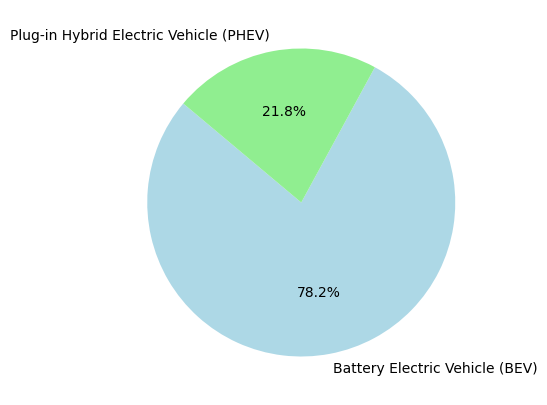

In [ ]:
# The number of Battery Electric Vehicle (BEV) in Washington
num_bev = len(ev_population[ev_population["Electric Vehicle Type"]=='Battery Electric Vehicle (BEV)'])

# The number of Plug-in Hybrid Electric Vehicle (PHEV) in Washington
num_phev = len(ev_population[ev_population["Electric Vehicle Type"]=='Plug-in Hybrid Electric Vehicle (PHEV)'])

print ("Battery Electric Vehicle (BEV) = {}".format(num_bev))
print ("Plug-in Hybrid Electric Vehicle (PHEV) = {}".format(num_phev))



ev_types_counts = ev_population["Electric Vehicle Type"].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
ev_types_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'coral'])
plt.ylabel('')  # Remove the y-label as it's not needed for pie charts

# Display the pie chart
plt.show()

## **Top 5 EV Makers:**

         Make  Total Cars
34      TESLA       77624
27     NISSAN       13992
6   CHEVROLET       13461
11       FORD        8893
4         BMW        7450


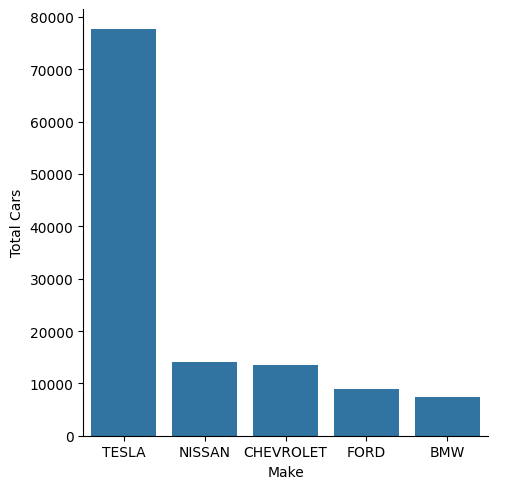

In [ ]:
#group electric vehicles by makers
vehicles_by_brand = ev_population.groupby("Make").agg({"Make":'count'}).rename(columns={'Make': 'Total Cars'})

#remove index
vehicles_by_brand = vehicles_by_brand.reset_index()

#get top5 makers
top5_vehicle = vehicles_by_brand.sort_values(by=['Total Cars'], ascending=False).head(5)

print (top5_vehicle)

# make a bar chart
sns.catplot(y='Total Cars', x='Make', kind='bar', data=top5_vehicle)


## **Electric Vehicle Range Distribution:**

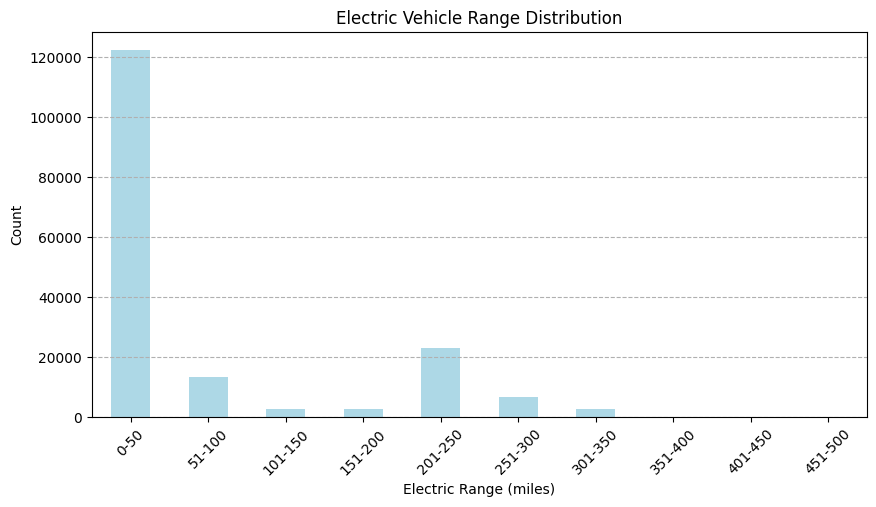

In [ ]:
# Define bins and their labels
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# Categorize the electric range into bins
ev_population['Electric Range Category'] = pd.cut(ev_population['Electric Range'], bins=bins, labels=bin_labels, right=False)

# Count the occurrences in each bin
electric_range_counts = ev_population['Electric Range Category'].value_counts(sort=False)

# Create the bar chart for the electric range bins
plt.figure(figsize=(10, 5))
electric_range_counts.plot(kind='bar', color='lightblue')
plt.title('Electric Vehicle Range Distribution')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Display the bar chart
plt.show()

**Summary:**

A large majority of EVs owned have a very short electric range, or distance that it can travel before the battery needs to be recharged. This is a cause for consideration of the locations of charging stations - more may need to be built, in closer proximity, in order to service more who purchase these Makes and Models of EVs.


## **Breakdown of Clean Alternative Fuel Vehicle (CAFV) Eligibility for Tax Deductions:**

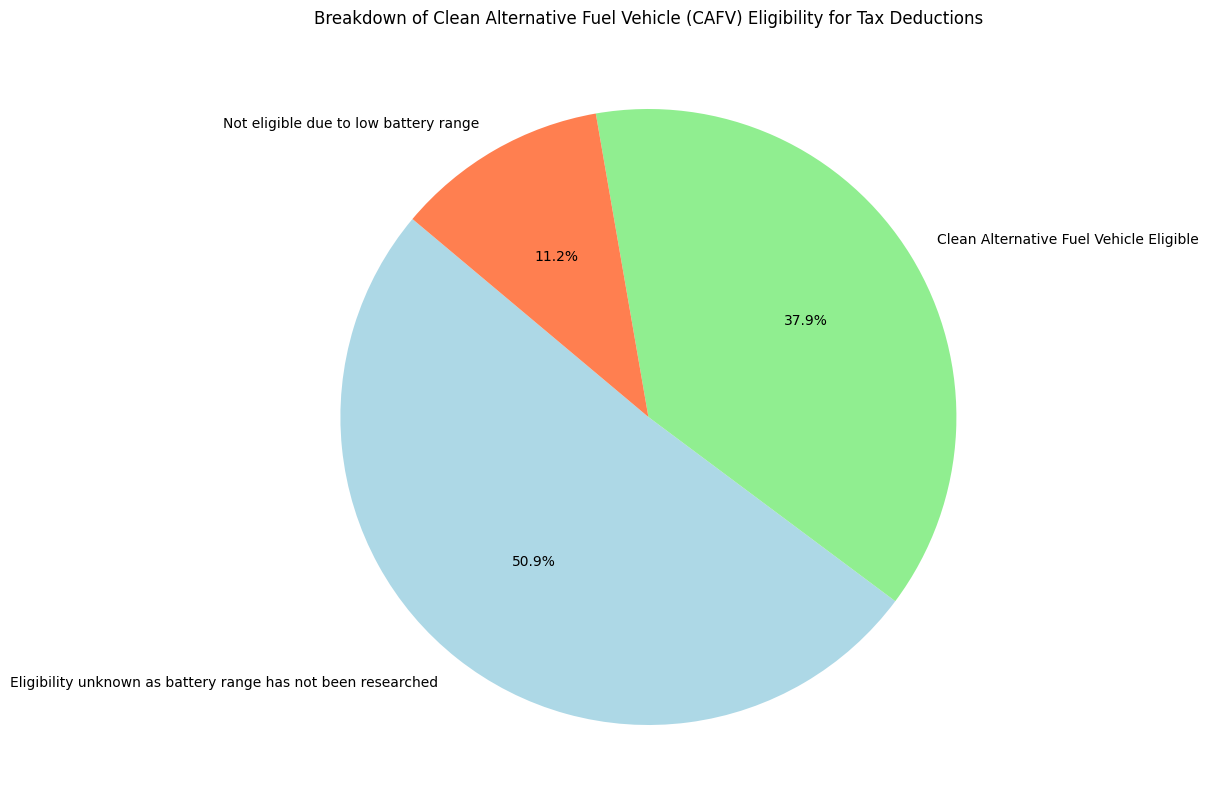

In [ ]:
caf_eligibility_counts = ev_population['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 10))
caf_eligibility_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'coral'])
plt.title('Breakdown of Clean Alternative Fuel Vehicle (CAFV) Eligibility for Tax Deductions')
plt.ylabel('')  # Remove the y-label as it's not needed for pie charts

# Display the pie chart
plt.show()

**Summary:**

Interestingly, it appears that while tax deductions are available for EVs eligible for Clean Alternative Fuel Vehicle (CAFV), a large proportion of EVs have been purchased in spite of its eligibility being unknown.

## **Trend of EV Sales:**

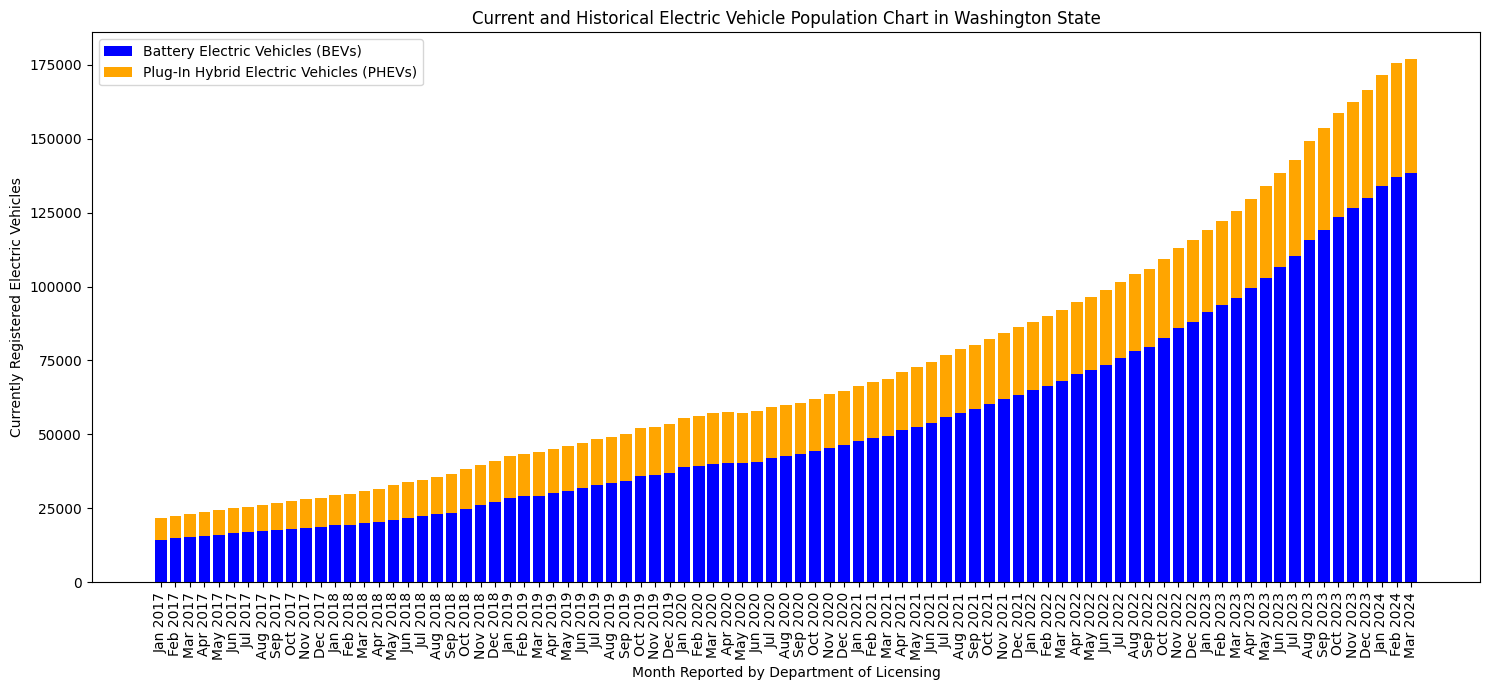

In [ ]:
# Group the data by date and sum the BEVs and PHEVs separately
ev_salestrend_wa = ev_sales_wa.groupby('Date').agg({
    'Battery Electric Vehicles (BEVs)': 'sum',
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'sum'
}).reset_index()

# Calculate the EV total for the stacked bar chart
ev_salestrend_wa['EV_Total'] = ev_salestrend_wa['Battery Electric Vehicles (BEVs)'] + ev_salestrend_wa['Plug-In Hybrid Electric Vehicles (PHEVs)']

# Plot the stacked bar chart
plt.figure(figsize=(15, 7))
plt.bar(ev_salestrend_wa['Date'].dt.strftime('%b %Y'), ev_salestrend_wa['Battery Electric Vehicles (BEVs)'],
        color='blue', label='Battery Electric Vehicles (BEVs)')
plt.bar(ev_salestrend_wa['Date'].dt.strftime('%b %Y'), ev_salestrend_wa['Plug-In Hybrid Electric Vehicles (PHEVs)'],
        bottom=ev_salestrend_wa['Battery Electric Vehicles (BEVs)'],
        color='orange', label='Plug-In Hybrid Electric Vehicles (PHEVs)')

plt.title('Current and Historical Electric Vehicle Population Chart in Washington State')
plt.xlabel('Month Reported by Department of Licensing')
plt.ylabel('Currently Registered Electric Vehicles')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Summary:**

EV Sales has been on an increasing trend over the years of 2017 to date.

### **Linear Regression on the Trend**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


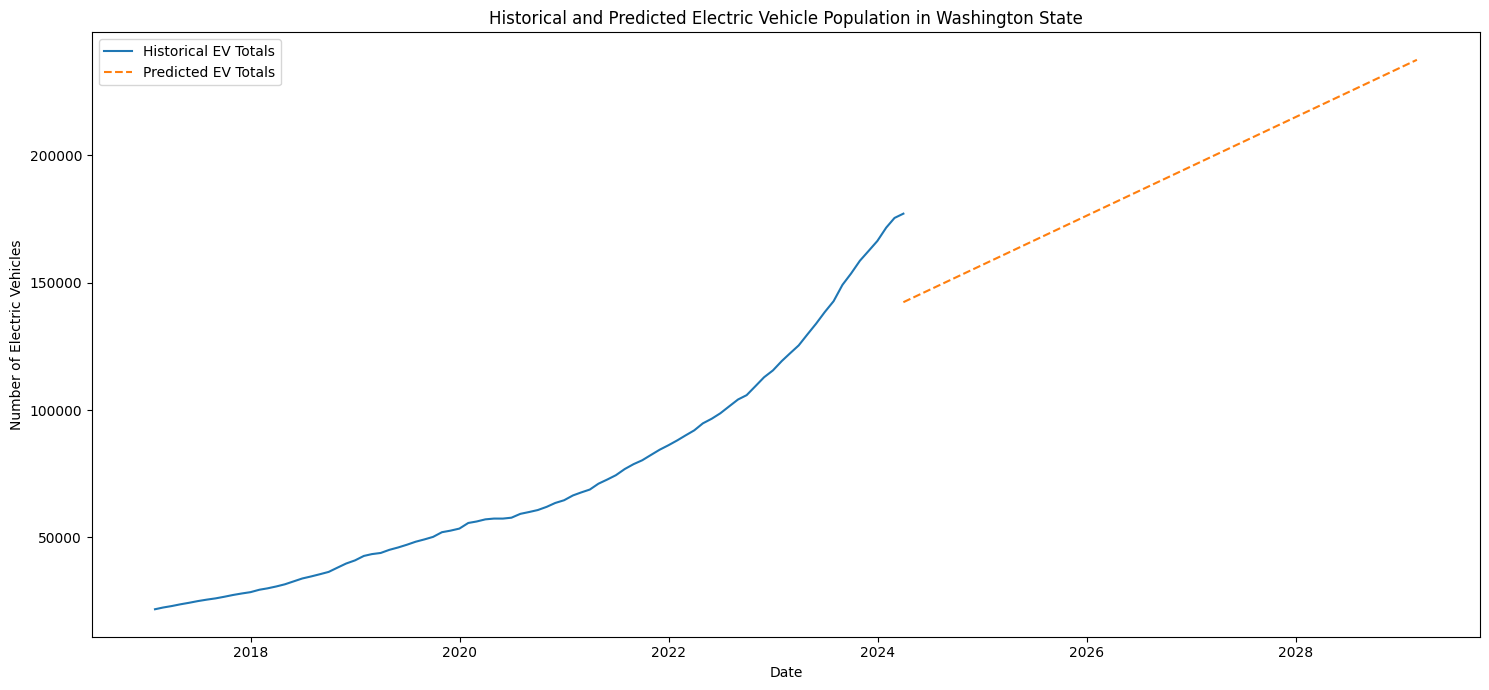

''

In [ ]:
from sklearn.linear_model import LinearRegression

# Group by date and sum up the EV totals
ev_sales_wa = ev_sales_wa.groupby('Date').agg({'Electric Vehicle (EV) Total': 'sum'}).reset_index()
ev_sales_wa = ev_sales_wa.sort_values('Date')

# Convert dates to ordinal for linear regression
ev_sales_wa['DateOrdinal'] = ev_sales_wa['Date'].map(pd.Timestamp.toordinal)

# Create and fit the linear regression model
X = ev_sales_wa[['DateOrdinal']]
y = ev_sales_wa['Electric Vehicle (EV) Total']
model = LinearRegression()
model.fit(X, y)

# Predict future trends for the next 5 years on a monthly basis
future_dates = pd.date_range(ev_sales_wa['Date'].max(), periods=60, freq='M')
future_dates_ordinal = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)
future_ev_totals = model.predict(future_dates_ordinal)

# Plot the historical data
plt.figure(figsize=(15, 7))
plt.plot(ev_sales_wa['Date'], ev_sales_wa['Electric Vehicle (EV) Total'], label='Historical EV Totals')

# Plot the predictions
plt.plot(future_dates, future_ev_totals, linestyle='--', label='Predicted EV Totals')

# Customize the plot
plt.title('Historical and Predicted Electric Vehicle Population in Washington State')
plt.xlabel('Date')
plt.ylabel('Number of Electric Vehicles')
plt.legend()
plt.tight_layout()
plt.show()
;

**Summary:**

Sales of EV is projected to double by 2030.

In [ ]:
from sklearn.linear_model import LinearRegression

# Load the data from the uploaded file
file_path = '/content/drive/MyDrive/data files/Electric_Vehicle_Population_Size_History_By_County_20240420.csv'
ev_data_wa = pd.read_csv(file_path)

# Filter for Washington State only and convert 'Date' to datetime
ev_data_wa = ev_data_wa[ev_data_wa['State'] == 'WA']
ev_data_wa['Date'] = pd.to_datetime(ev_data_wa['Date'])

# Group by date and sum up the EV totals
ev_totals_by_date_wa = ev_data_wa.groupby('Date').agg({'Electric Vehicle (EV) Total': 'sum'}).reset_index()
ev_totals_by_date_wa = ev_totals_by_date_wa.sort_values('Date')  # Sort by date to ensure proper plotting

# Convert dates to ordinal for linear regression
ev_totals_by_date_wa['DateOrdinal'] = ev_totals_by_date_wa['Date'].map(pd.Timestamp.toordinal)

# Create and fit the linear regression model
X = ev_totals_by_date_wa[['DateOrdinal']]
y = ev_totals_by_date_wa['Electric Vehicle (EV) Total']
model = LinearRegression()
model.fit(X, y)

# Predict future trends for the next 5 years on a monthly basis
future_dates = pd.date_range(ev_totals_by_date_wa['Date'].max(), periods=60, freq='M')
future_dates_ordinal = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)
future_ev_totals = model.predict(future_dates_ordinal)

# Prepare data for the table creation
# Adding historical sales
historical_ev_sales = ev_totals_by_date_wa[['Date', 'Electric Vehicle (EV) Total']].copy()
historical_ev_sales['Year'] = historical_ev_sales['Date'].dt.year
historical_ev_sales = historical_ev_sales.groupby('Year').agg({'Electric Vehicle (EV) Total': 'max'}).reset_index()

# Calculate % increase for historical data
historical_ev_sales['% Increase'] = historical_ev_sales['Electric Vehicle (EV) Total'].pct_change() * 100

# Adding predicted sales
predicted_ev_sales = pd.DataFrame({
    'Date': future_dates,
    'Electric Vehicle (EV) Total': future_ev_totals
})
predicted_ev_sales['Year'] = predicted_ev_sales['Date'].dt.year
predicted_ev_sales = predicted_ev_sales.groupby('Year').agg({'Electric Vehicle (EV) Total': 'max'}).reset_index()

# Calculate % increase for predicted data
predicted_ev_sales['% Increase'] = predicted_ev_sales['Electric Vehicle (EV) Total'].pct_change() * 100

# Output both tables
historical_ev_sales, predicted_ev_sales

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(   Year  Electric Vehicle (EV) Total  % Increase
 0  2017                        28515         NaN
 1  2018                        40975   43.696300
 2  2019                        53465   30.482001
 3  2020                        64594   20.815487
 4  2021                        86200   33.448927
 5  2022                       115565   34.066125
 6  2023                       166375   43.966599
 7  2024                       177102    6.447483,
    Year  Electric Vehicle (EV) Total  % Increase
 0  2024                156925.096005         NaN
 1  2025                176273.747044   12.329864
 2  2026                195622.398083   10.976479
 3  2027                214971.049123    9.890816
 4  2028                234372.710165    9.025244
 5  2029                237500.300333    1.334452)

## **Top 20 Counties in WA state by car sales**

<ipython-input-71-939606f28296>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_counties.index, x=top_counties.values, palette='viridis')  # Choose a color palette


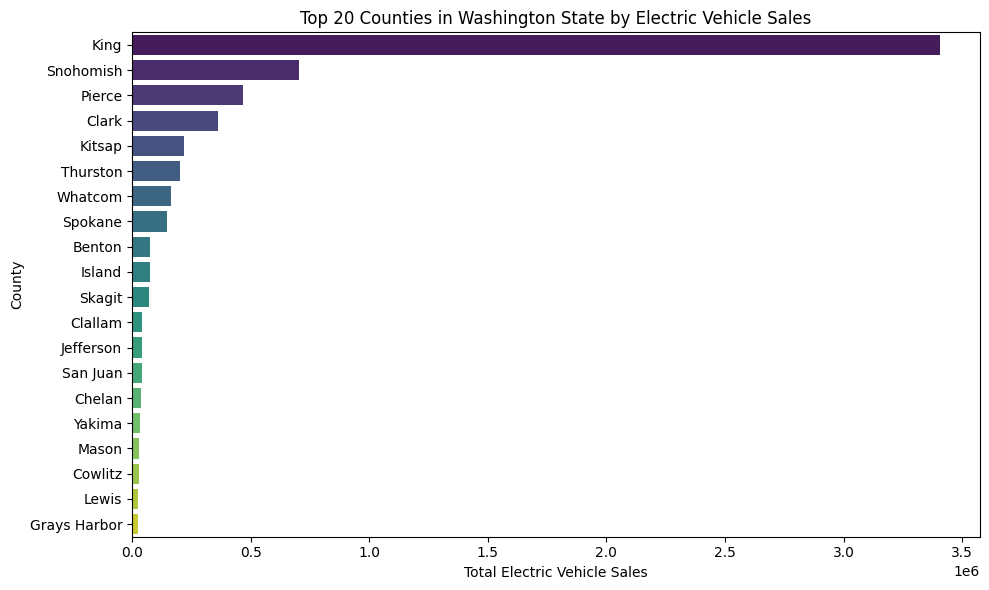

In [ ]:

# Load the data
file_path = '/content/drive/MyDrive/data files/Electric_Vehicle_Population_Size_History_By_County_20240420.csv'
ev_data = pd.read_csv(file_path)

# Create a total EVs column and then group by County
ev_data['Total EVs'] = ev_data['Battery Electric Vehicles (BEVs)'] + ev_data['Plug-In Hybrid Electric Vehicles (PHEVs)']
county_sales = ev_data.groupby('County')['Total EVs'].sum().sort_values(ascending=False)

# Plot the top 20 counties
plt.figure(figsize=(10, 6))  # Set the figure size as needed
top_counties = county_sales.head(20)
sns.barplot(y=top_counties.index, x=top_counties.values, palette='viridis')  # Choose a color palette

# Add title and labels
plt.title('Top 20 Counties in Washington State by Electric Vehicle Sales')
plt.xlabel('Total Electric Vehicle Sales')
plt.ylabel('County')

# Tight layout for better spacing
plt.tight_layout()
plt.show()






---


# **Understanding the Charging Network in Washington**




## **Number of EV Charging Stations**






In [ ]:
# Total number of electric vehicle charging stations in Washington
total_station = len(ev_charging_stations)

print ("The total number of electric vehicle charging stations in Washington is", total_station)

The total number of electric vehicle charging stations in Washington is 1502


## **List of EV Charging Station Brands**

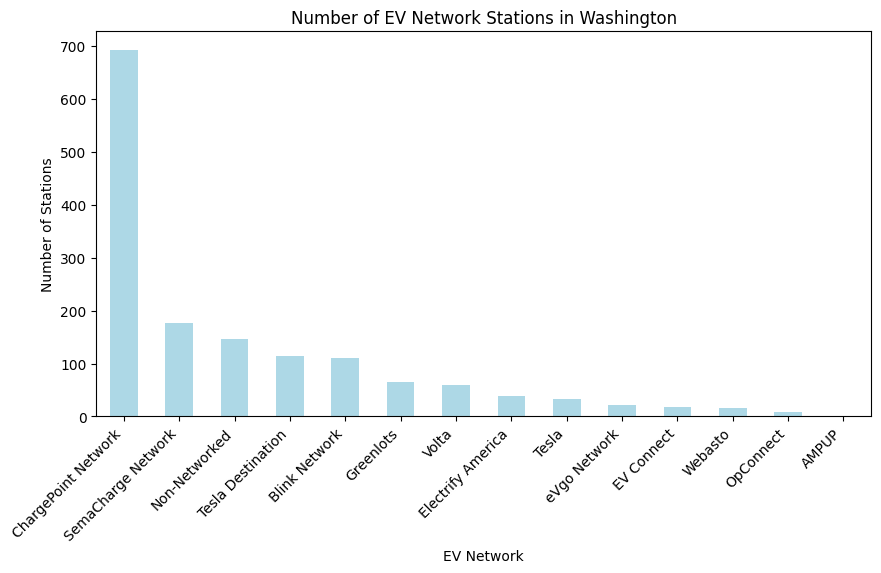

In [ ]:
# Filter the data for stations in Washington
washington_stations = ev_charging_stations[ev_charging_stations['State'] == 'WA']

# Get the value counts for the 'EV Network' column for stations in Washington
washington_ev_network_counts = washington_stations['EV Network'].value_counts()

# Set the size of the figure
plt.figure(figsize=(10,5))

# Create the bar chart
washington_ev_network_counts.plot(kind='bar', color='lightblue')

# Set the title and labels
plt.title('Number of EV Network Stations in Washington')
plt.xlabel('EV Network')
plt.ylabel('Number of Stations')

# Rotate the x-ticks for better readability
plt.xticks(rotation=45, ha='right');


**Summary:**

From the above chart, it is clear that ChargePoint Network has the largest number of charging stations, with almost 700 (or half of the total) in Washington State.



---


# **Visualising the Geospatial Data**

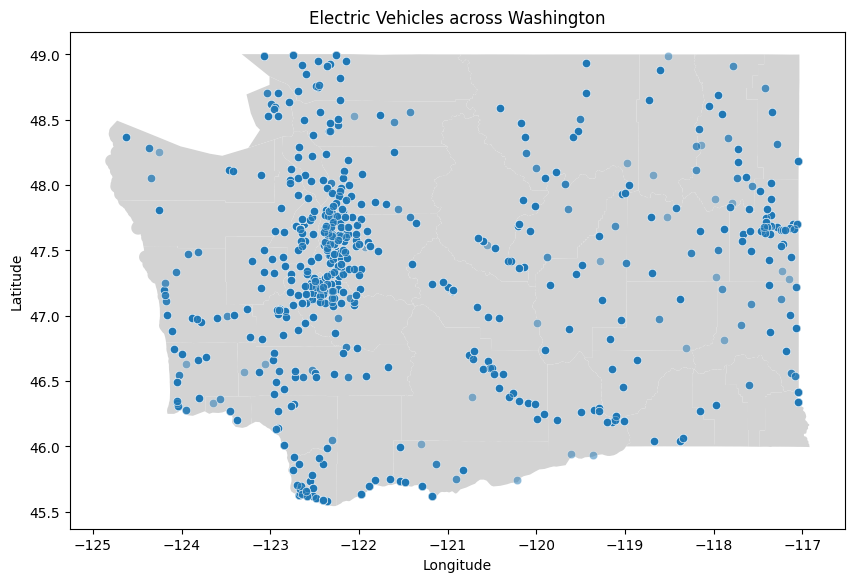

In [ ]:
## Visualising Electric Vehicles across Washington State

#Using geopandas to bring in a base layer of WA boroughs
wa_map = gpd.read_file('/content/drive/MyDrive/data files/WA_County_Boundaries')

#Set up the size of figure
fig, ax = plt.subplots(figsize = (10,10))

# Draw Washington area in map based on longitude and latitude
wa_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')

# Draw scatterplot showing location of EVs in Washington based on longitude and latitude
sns.scatterplot(ax=ax, x='Longitude', y='Latitude', alpha=0.5, data=ev_population)
plt.title('Electric Vehicles across Washington')
plt.show()

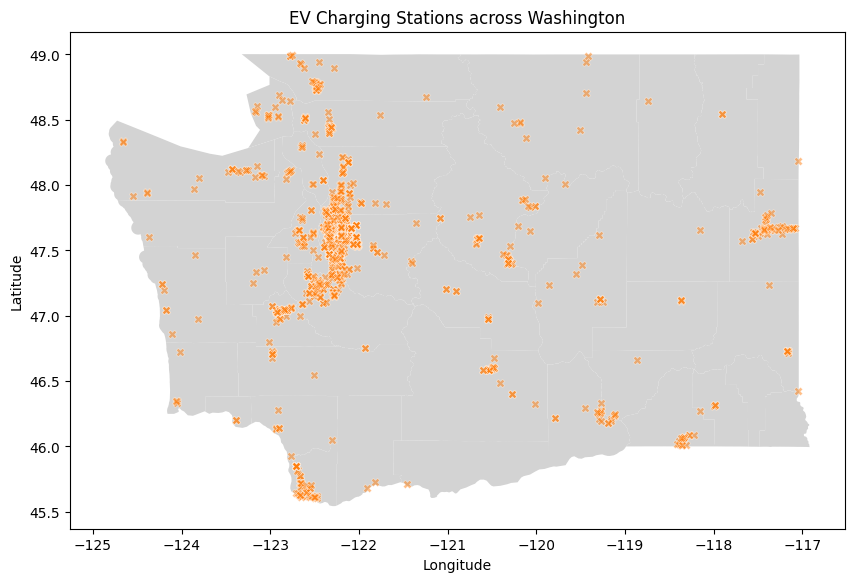

In [ ]:
## Visualising Charging Stations across Washington State

#Using geopandas to bring in a base layer of WA boroughs
wa_map = gpd.read_file('/content/drive/MyDrive/data files/WA_County_Boundaries')


#Set up the size of figure
fig, ax = plt.subplots(figsize = (10,10))

# Draw Washington area in map based on longitude and latitude
wa_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')

# Draw scatterplot showing location of electric vehicle charging stations in Washington based on longitude and latitude
sns.scatterplot(ax=ax, x='Longitude', y='Latitude', alpha=0.5, c='C1', marker='X', data=ev_charging_stations)
plt.title('EV Charging Stations across Washington')
plt.show()

**Summary:**

EV ownership and electric vehicle charging stations are largely concentrated in the regions close to Seattle/Tacoma, WA.

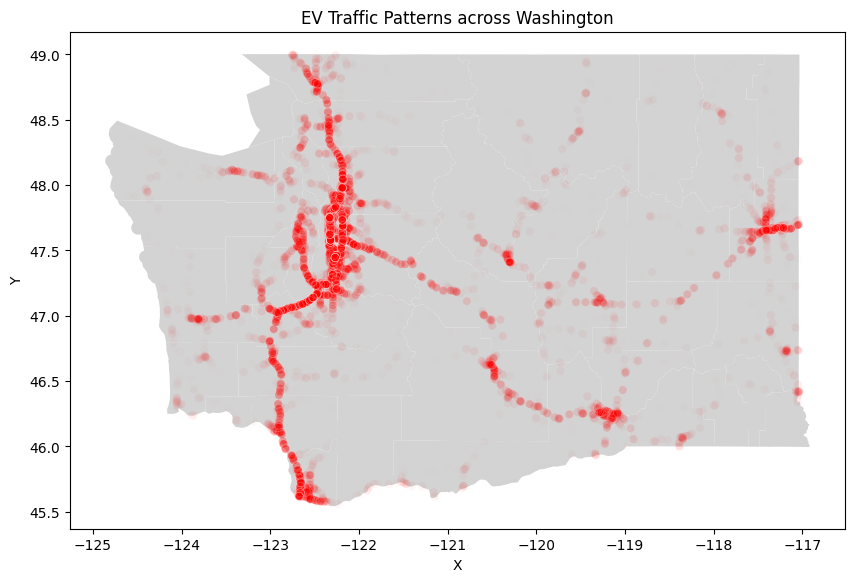

In [ ]:
## Visualising Traffic Patterns across Washington State

#Using geopandas to bring in a base layer of WA boroughs
wa_map = gpd.read_file('/content/drive/MyDrive/data files/WA_County_Boundaries')

#Set up the size of figure
fig, ax = plt.subplots(figsize = (10,10))

#Draw Washington area in map based on longitude and latitude
wa_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')

# Draw scatterplot showing location of electric vehicle traffic patterns in Washington based on longitude and latitude
sns.scatterplot(ax=ax, x='X', y='Y',alpha=wa_average_daily_traffic, c='red', data=wa_traffic)
plt.title('EV Traffic Patterns across Washington')
plt.show()

**Summary:**

Average daily traffic volume is highly concentrated in the regions close to Seattle/Tacoma, WA, with continued flow north and south of the city into the bordering regions of Oregon and British Columbia.

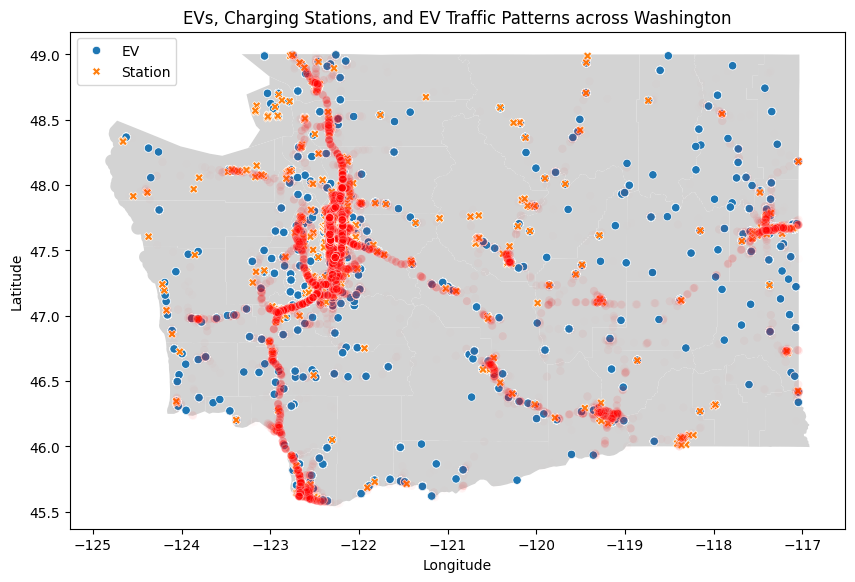

In [ ]:
#Get longitude and latitude data from ev population and stations file
long_lat_evs = pd.DataFrame({
    'Type':'EV',
    'Longitude': ev_population['Longitude'],
    'Latitude': ev_population['Latitude'],
})

long_lat_stations = pd.DataFrame({
    'Type':'Station',
    'Longitude': ev_charging_stations['Longitude'],
    'Latitude': ev_charging_stations['Latitude'],
})

#Combine both data into the same table
long_lat_data = pd.concat([long_lat_evs, long_lat_stations], axis=0, ignore_index=True)
long_lat_data

#Set up the size of figure
fig, ax = plt.subplots(figsize = (10,10))

# Draw Washington area in map based on longitude and latitude
wa_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')

# Draw scatterplot showing location of evs, charging stations, and traffic patterns in Washington based on longitude and latitude
sns.scatterplot(ax=ax, x='Longitude', y='Latitude', hue='Type', style='Type', data=long_lat_data)
sns.scatterplot(ax=ax, x='X', y='Y',alpha=wa_average_daily_traffic, c='red', data=wa_traffic)

plt.title('EVs, Charging Stations, and EV Traffic Patterns across Washington')
plt.show()

**Summary:**

Average daily traffic, EV charging stations, and EV ownership volume are in fairly consistent concentrated zones, but there are notable shortages of EV charging stations in areas of EV ownership in the northeast and southeast quadrants of WA.

# **Comparing the density of electric vehicles and charging stations across cities**

In [ ]:
# Calculate how many EV points in each city
ev_charging_stations_chargers = ev_charging_stations.groupby('City').agg({'EV Level1 EVSE Num': 'sum', 'EV Level2 EVSE Num':'sum', 'EV DC Fast Count':'sum'})
ev_charging_stations_chargers["Total Chargers"] = ev_charging_stations_chargers['EV Level1 EVSE Num'] + ev_charging_stations_chargers['EV Level2 EVSE Num'] + ev_charging_stations_chargers['EV DC Fast Count']

# Calculate how many EV cars in each city
ev_population_cars = ev_population.groupby('City').agg({'Model':"count"})

# Merge EV charging points and EV cars data
city_merge = ev_charging_stations_chargers.merge(ev_population_cars, how='left', on='City')

# Rename
city_merge = city_merge.rename(columns={'EV Level1 EVSE Num': 'EV Level1', 'EV Level2 EVSE Num': 'EV Level2', 'EV DC Fast Count': 'EV Fast', 'Model': 'Total EVs'})

# Add a ratio column EVs per Charger (#Total EVs / #Total Chargers)
city_merge['EVs per Charger'] = round(city_merge['Total EVs']/city_merge['Total Chargers'], 1)

# Sorting by EVs per Charger Ratio
city_merge = city_merge.sort_values(by=['EVs per Charger'], ascending=False)

# Add a total row in the end
# totals = city_merge[['EV Level1', 'EV Level2', 'EV Fast', 'Total Chargers', 'Total EVs']].sum()
# city_merge.loc['Total'] = pd.Series(totals)

print (city_merge)

              EV Level1  EV Level2  EV Fast  Total Chargers  Total EVs  \
City                                                                     
Newcastle           0.0        2.0      0.0             2.0      878.0   
Maple Valley        0.0        4.0      0.0             4.0     1375.0   
Sammamish           0.0       16.0      0.0            16.0     5095.0   
Vashon              0.0        2.0      0.0             2.0      611.0   
Shoreline           0.0        7.0      0.0             7.0     1898.0   
...                 ...        ...      ...             ...        ...   
Sea Tac             0.0        4.0      0.0             4.0        NaN   
SeaTac              0.0       18.0      2.0            20.0        NaN   
Vista Dr            0.0        2.0      0.0             2.0        NaN   
pasco               0.0        1.0      1.0             2.0        NaN   
spokane             0.0        1.0      0.0             1.0        NaN   

              EVs per Charger  
City 

In [ ]:
city_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, Newcastle to spokane
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EV Level1        179 non-null    float64
 1   EV Level2        179 non-null    float64
 2   EV Fast          179 non-null    float64
 3   Total Chargers   179 non-null    float64
 4   Total EVs        162 non-null    float64
 5   EVs per Charger  162 non-null    float64
dtypes: float64(6)
memory usage: 9.8+ KB


In [ ]:
# Fill in 0 in NaN
city_merge['Total EVs'] = city_merge['Total EVs'].fillna(0).astype('int')
city_merge['EVs per Charger'] = city_merge['EVs per Charger'].fillna(0)

# Change ['EV Level1', 'EV Level2', 'EV Fast', 'Total Chargers'] as integer
city_merge.astype({"EV Level1": int, "EV Level2": int, "EV Fast": int, "Total Chargers": int})

,EV Level1,EV Level2,EV Fast,Total Chargers,Total EVs,EVs per Charger
City,,,,,,
Newcastle,0,2,0,2,878,439.0
Maple Valley,0,4,0,4,1375,343.8
Sammamish,0,16,0,16,5095,318.4
Vashon,0,2,0,2,611,305.5
Shoreline,0,7,0,7,1898,271.1
...,...,...,...,...,...,...
Sea Tac,0,4,0,4,0,0.0
SeaTac,0,18,2,20,0,0.0
Vista Dr,0,2,0,2,0,0.0


In [ ]:
# Import population data in Washington
csv1_city_pop_filepath = '/content/drive/MyDrive/data files/Washington_Cities_by_Population.csv'
city_pop_raw = pd.read_csv(csv1_city_pop_filepath)
city_pop_raw

,pop2024,pop2020,growth,name,aland_sqmi,intptlat,intptlong,slug,usps,lsad,lng,lat,type,rank,density
0,757992,740520,0.00580,Seattle,84.000,47.6193,-122.352,seattle-wa,WA,2,-122.352,47.6193,City,1,9024
1,231133,229187,0.00211,Spokane,68.760,47.6669,-117.433,spokane-wa,WA,2,-117.433,47.6669,City,2,3361
2,223859,219693,0.00468,Tacoma,49.714,47.2522,-122.460,tacoma-wa,WA,2,-122.460,47.2522,City,3,4503
3,197765,191259,0.00830,Vancouver,48.748,45.6372,-122.597,vancouver-wa,WA,2,-122.597,45.6372,City,4,4057
4,153768,151766,0.00327,Bellevue,33.468,47.5978,-122.156,bellevue-wa,WA,2,-122.156,47.5978,City,5,4594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,16,0,0.33333,Hogans Corner,0.308,47.0415,-124.162,hogans-corner-wa,WA,5,-124.162,47.0415,CDP,623,52
623,12,82,-0.58621,Orient,0.432,48.8638,-118.206,orient-wa,WA,5,-118.206,48.8638,CDP,624,28
624,10,14,-0.09091,Silvana,1.532,48.2019,-122.246,silvana-wa,WA,5,-122.246,48.2019,CDP,625,7
625,7,11,-0.12500,Anatone,0.120,46.1354,-117.132,anatone-wa,WA,5,-117.132,46.1354,CDP,626,58


In [ ]:
# Merge with Charging Station data
city_pop_raw = city_pop_raw.rename(columns={'name':'City', 'pop2024':'Population'})
city_pop = city_pop_raw.groupby('City').agg({'Population': 'sum'})
city_pop_station_car = city_merge.merge(city_pop, how='left', on='City').sort_values(by=['Population'], ascending=False)
city_pop_station_car = city_pop_station_car.reset_index()

city_pop_station_car

,City,EV Level1,EV Level2,EV Fast,Total Chargers,Total EVs,EVs per Charger,Population
0,Seattle,0.0,725.0,111.0,836.0,28856,34.5,757992.0
1,Spokane,1.0,110.0,11.0,122.0,2670,21.9,231133.0
2,Tacoma,2.0,113.0,8.0,123.0,3647,29.7,223859.0
3,Vancouver,0.0,71.0,38.0,109.0,6038,55.4,197765.0
4,Bellevue,0.0,344.0,23.0,367.0,8728,23.8,153768.0
...,...,...,...,...,...,...,...,...
174,SPOKANE,0.0,3.0,1.0,4.0,0,0.0,NaN
175,Sea Tac,0.0,4.0,0.0,4.0,0,0.0,NaN
176,Vista Dr,0.0,2.0,0.0,2.0,0,0.0,NaN
177,pasco,0.0,1.0,1.0,2.0,0,0.0,NaN


In [ ]:
# Add a population ratio column (#Population / #Total Chargers)
city_pop_station_car['Headcount per Charger'] = round(city_pop_station_car['Population']/city_pop_station_car['Total Chargers'], 1)
city_pop_station_car.head(10)

,City,EV Level1,EV Level2,EV Fast,Total Chargers,Total EVs,EVs per Charger,Population,Headcount per Charger
0,Seattle,0.0,725.0,111.0,836.0,28856,34.5,757992.0,906.7
1,Spokane,1.0,110.0,11.0,122.0,2670,21.9,231133.0,1894.5
2,Tacoma,2.0,113.0,8.0,123.0,3647,29.7,223859.0,1820.0
3,Vancouver,0.0,71.0,38.0,109.0,6038,55.4,197765.0,1814.4
4,Bellevue,0.0,344.0,23.0,367.0,8728,23.8,153768.0,419.0
5,Kent,0.0,24.0,3.0,27.0,2715,100.6,132204.0,4896.4
6,Everett,0.0,39.0,16.0,55.0,2412,43.9,111793.0,2032.6
7,Spokane Valley,0.0,11.0,10.0,21.0,686,32.7,111125.0,5291.7
8,Renton,0.0,122.0,7.0,129.0,4871,37.8,101386.0,785.9
9,Yakima,0.0,28.0,14.0,42.0,648,15.4,96969.0,2308.8


## **EVs and Headcount Per Charger in the Top 10 Most Populous Cities**

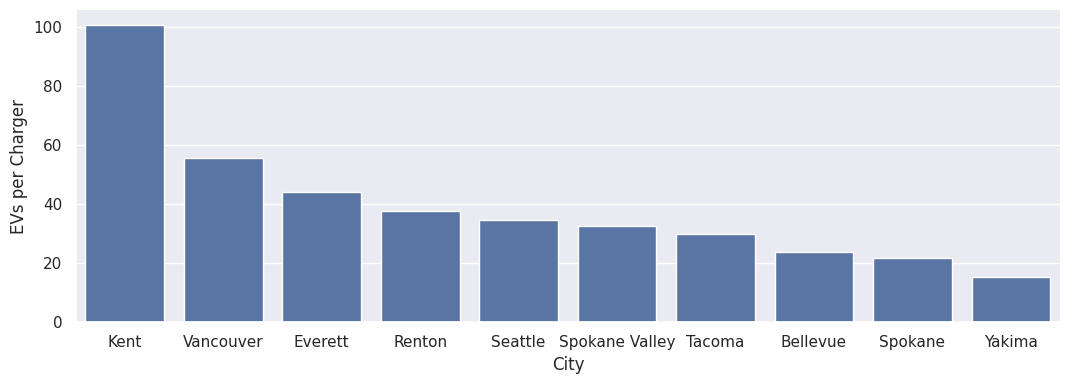

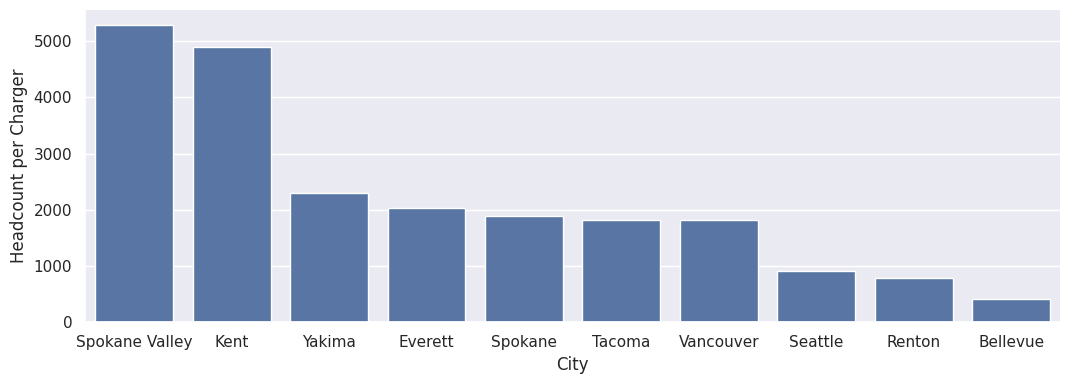

In [ ]:
# Get top10 city based on populations
top10_city = city_pop_station_car.head(10)

sns.set_theme(rc={'figure.figsize':(15,50)})

# Show EVs per Charger (#Total EVs / #Total Chargers) for top10 city
sns.catplot(y='EVs per Charger', x='City', kind='bar', data=top10_city, height=4, aspect=2.7, order=top10_city.sort_values(by = ['EVs per Charger'], ascending = False).City)

# Show Headcount per Charger (#Population / #Total Chargers) for top10 city
top10_city = top10_city.sort_values(by = ['Headcount per Charger'], ascending = False)
sns.catplot(y='Headcount per Charger', x='City', kind='bar', data=top10_city, height=4, aspect=2.7)

**Summary:**

According to [analysis from SBD Automotive](https://www.repairerdrivennews.com/2023/09/12/interactive-index-show-how-each-u-s-state-measures-up-in-ev-charging/#:~:text=Eight%20to%2012%20EVs%20per,to%20analysis%20from%20SBD%20Automotive.), the ideal ratio is between 8 and 12 electric vehicles (EVs) per public charger. Among the top 10 most populous cities in Washington, Yakima—with 15.4 EVs per charger—is closest to this ideal ratio. However, most of these cities have between 20 and 60 EVs per charger, indicating significant room for improvement.

Besides, when examining the headcount per charger in cities such as Spokane Valley and Kent, the ratio is approximately 5000 headcount per charger, which is the highest observed. In most other cities, the ratio is around 2000 headcount per charger. This is an indicator that governments can monitor. A lower headcount per charger ratio may encourage residents to consider electric vehicles more favorably when making purchasing decisions.

## **Percentage Breakdown of the Top 5 EV Brands in the 10 Most Populous Cities**

Text(0.5, 1.0, 'Bellevue')

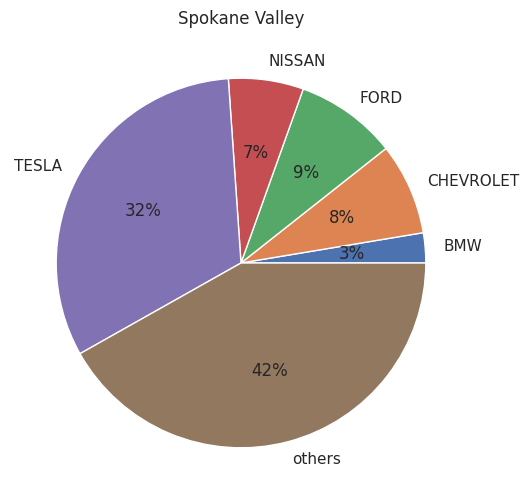

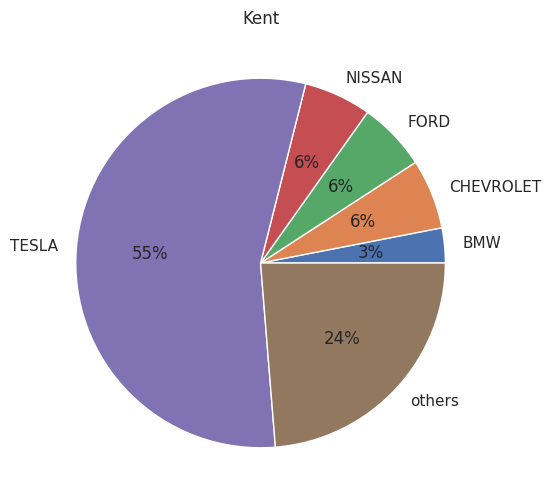

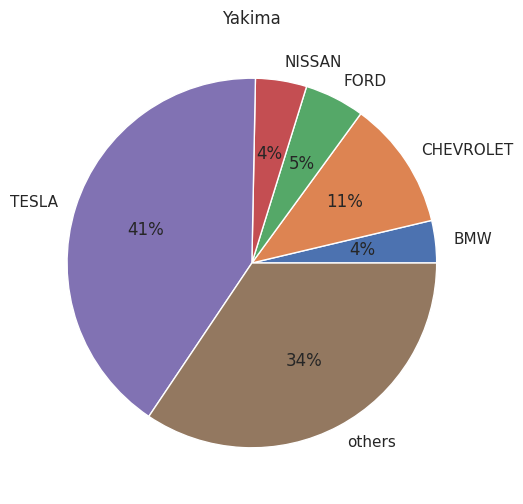

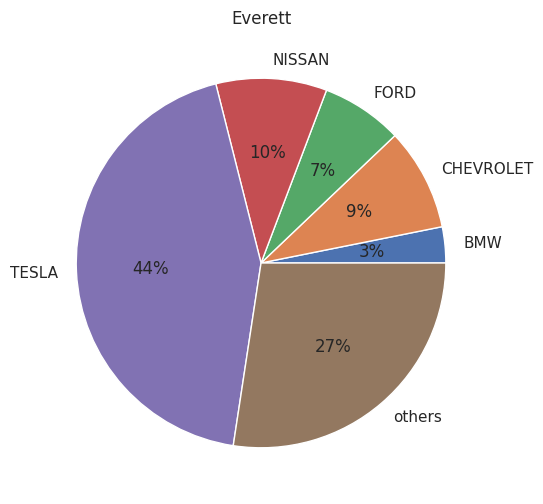

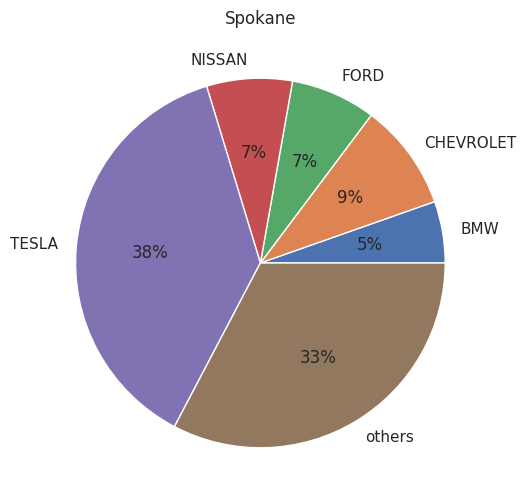

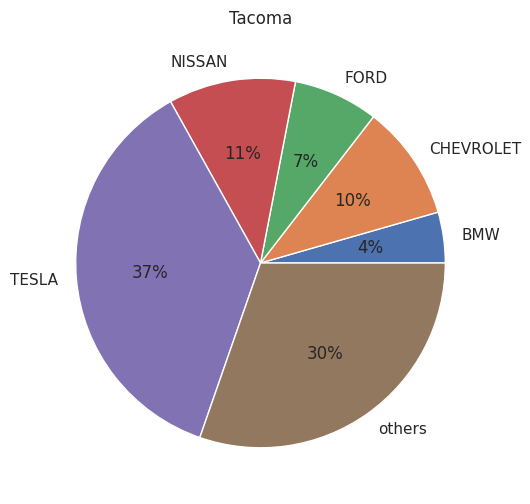

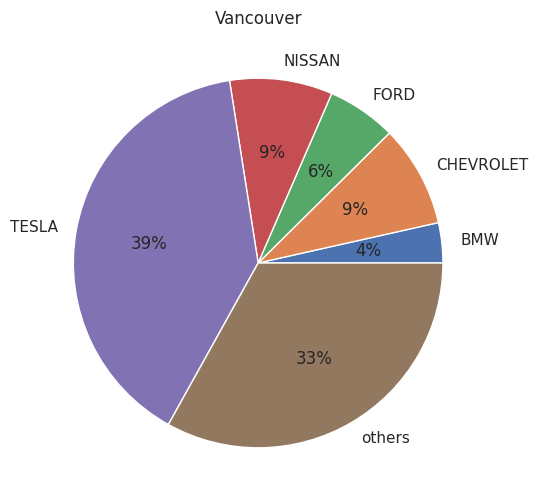

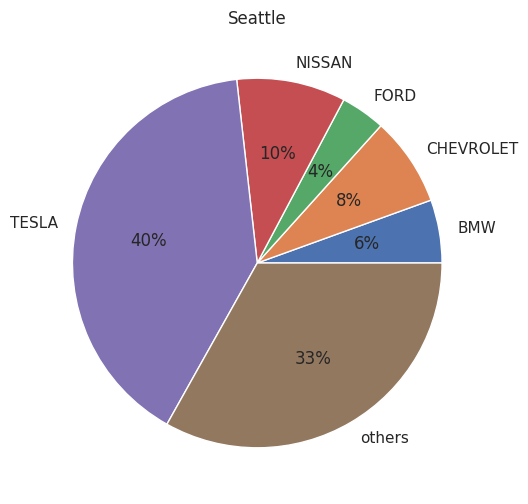

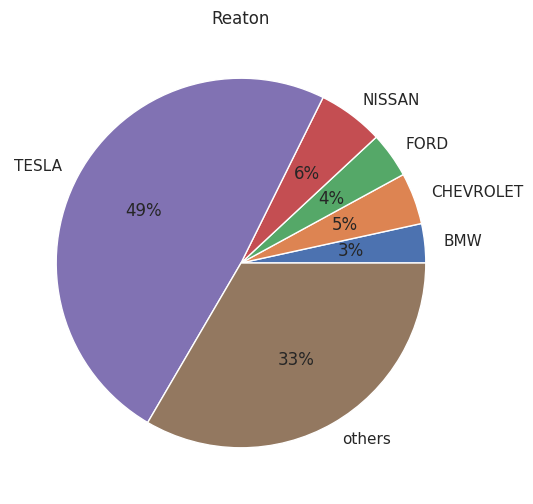

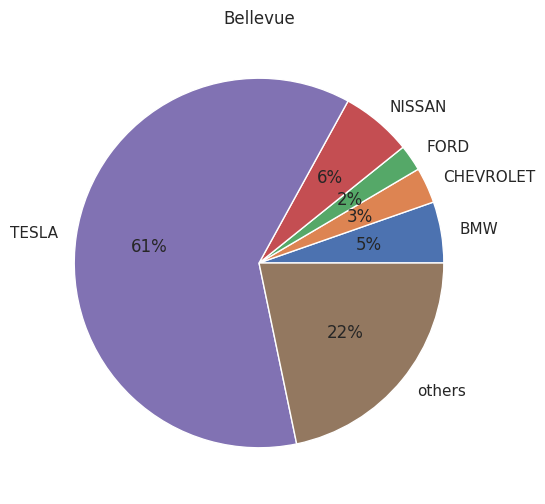

In [ ]:
# Only keep top 5 car brands in the data
ev_population['Make'] = ev_population['Make'].apply(lambda x: x if x in ['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'BMW'] else 'others')
top5_cars = ev_population.groupby(['City', 'Make']).agg({'Make':'count'}).rename(columns={'Make':'Num_Cars'})
top5_cars = top5_cars.reset_index()

# Based on Headcount per Charger, Breaking down % of brands share in top 5 cities
Spokane_V = top5_cars[top5_cars['City'] == 'Spokane Valley']
plt.figure(figsize=(6,6))
plt.pie(Spokane_V['Num_Cars'], labels=Spokane_V['Make'], autopct='%.0f%%')
plt.title('Spokane Valley')


Kent = top5_cars[top5_cars['City'] == 'Kent']
plt.figure(figsize=(6,6))
plt.pie(Kent['Num_Cars'], labels=Kent['Make'], autopct='%.0f%%')
plt.title('Kent')


Yakima = top5_cars[top5_cars['City'] == 'Yakima']
plt.figure(figsize=(6,6))
plt.pie(Yakima['Num_Cars'], labels=Yakima['Make'], autopct='%.0f%%')
plt.title('Yakima')

Everett = top5_cars[top5_cars['City'] == 'Everett']
plt.figure(figsize=(6,6))
plt.pie(Everett['Num_Cars'], labels=Yakima['Make'], autopct='%.0f%%')
plt.title('Everett')

Spokane = top5_cars[top5_cars['City'] == 'Spokane']
plt.figure(figsize=(6,6))
plt.pie(Spokane['Num_Cars'], labels=Spokane['Make'], autopct='%.0f%%')
plt.title('Spokane')

Tacoma = top5_cars[top5_cars['City'] == 'Tacoma']
plt.figure(figsize=(6,6))
plt.pie(Tacoma['Num_Cars'], labels=Tacoma['Make'], autopct='%.0f%%')
plt.title('Tacoma')

Vancouver = top5_cars[top5_cars['City'] == 'Vancouver']
plt.figure(figsize=(6,6))
plt.pie(Vancouver['Num_Cars'], labels=Vancouver['Make'], autopct='%.0f%%')
plt.title('Vancouver')

Seattle = top5_cars[top5_cars['City'] == 'Seattle']
plt.figure(figsize=(6,6))
plt.pie(Seattle['Num_Cars'], labels=Seattle['Make'], autopct='%.0f%%')
plt.title('Seattle')

Renton = top5_cars[top5_cars['City'] == 'Renton']
plt.figure(figsize=(6,6))
plt.pie(Renton['Num_Cars'], labels=Renton['Make'], autopct='%.0f%%')
plt.title('Reaton')

Bellevue = top5_cars[top5_cars['City'] == 'Bellevue']
plt.figure(figsize=(6,6))
plt.pie(Bellevue['Num_Cars'], labels=Bellevue['Make'], autopct='%.0f%%')
plt.title('Bellevue')

**Summary:**

As expected, Tesla represents the largest portion of electric vehicles in all of the top 10 cities. However, in some cities, such as Spokane and Tacoma, the percentage of Tesla cars is less than 40%.  This data could also be considered by the government when deciding which types of chargers to support as they implement charging stations.


---

# **Challenges**


*   **Data Acquisition:** A major challenge was the reliance on freely available resources due to the absence of a budget for purchasing specialized data sets. This led to limitations in the quality and breadth of data available for analysis. As a solution we utilized publicly available data sources such as government open data portals, which often provide comprehensive datasets free of charge. For example, data from state departments or federal agencies can be valuable.

*   **Data Cleaning:** We encountered difficulties with missing values (N/A data) and irrelevant columns in our datasets. Deciding on the best methods to clean and prepare the data for analysis was a significant hurdle. To address the challenge of data cleaning, each team member was responsible for identifying columns with missing values (N/A) in their respective sections of the dataset. The team then convened to collectively review these findings. After thorough discussion, decisions were made collaboratively on whether to remove these columns or to replace the missing data, ensuring a standardized approach to maintaining data integrity throughout the project.

*   **Geostatistical Analysis:** Conducting geostatistical analysis presented challenges, particularly in interpreting spatial data effectively and applying it to understand EV adoption patterns across different regions. As resources and skills are limited, we simplified the scope of the geostatistical analysis to focus on essential insights that can still inform decision-making.

*   **Dashboard Creation:** Building an informative and interactive dashboard was complex, involving challenges in designing a user-friendly interface that could dynamically display the results of our analyses. The dashboard was built on Tableau and it was a major challenge to publish and publicly share the dashboard. After a lot of troubleshooting and trial & error, we figured out the best way to go about this.



---

# **Recommendations**

**1. Rational prioritizing EV infrastructure:** As per research, the ideal EVs per Charger ratio is 8-12 per charger.



*   **Short-term growth:** The government should prioritize infrastructure growth in the short term based on the number of EVs per charger in the top 10 cities based on population. - Kent, with 100 EVs per charger should be prioritised.
*   **Long-term growth:** In the long term, the government should prioritize based on the population headcount per charger in the top 10 cities since the likelihood of EV purchasing is much higher in those cities. - Spokane Valley, with more than 5000 people per charger should be prioritised.



**2. Charger compatibility:** The government should consider building infrastructure for the most prevalent brands to ensure compatibility of chargers with the vehicle make. The top brands across Washington State include Tesla, Nissan, Chevrolet, Ford, and BMW with Tesla having the highest sales.



---


# **References**
Plotting Maps with GeoPandas: https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73

Geopandas.org: https://geopandas.org/en/stable/docs/user_guide/projections.html





---


# **Generative AI Disclosure**

This report was prepared with the assistance of ChatGPT to generate ideas and first drafts for visualisation.